In [2]:
import pandas as pd
import seaborn as sns
import operator
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('events.csv')
df = df.filter(['id_odsp', 'event_type', 'time', 'event_team', 'side', 'location', 'situation', 'shot_place',
                'shot_outcome', 'bodypart', 'assist_method', 'is_goal'])

In [4]:
dictionary = open('dictionary.txt', 'r')
Lines = dictionary.readlines()

label = ''
dic = {}
for line in Lines:
    if line.strip() != "":
        first_word = line.split()[0]
        if (first_word.isdigit()):
            val = line[len(first_word):].lstrip().rstrip()
            dic[int(first_word)] = val
        else:
            if dic and label != "event_type2":
                df[label].replace(dic, inplace=True)
            dic = {}
            label = line.lstrip().rstrip()     
            
if dic and label != "event_type2":
                df[label].replace(dic, inplace=True)        

In [5]:
df.head(20)

,id_odsp,event_type,time,event_team,side,location,situation,shot_place,shot_outcome,bodypart,assist_method,is_goal
0,UFot0hit/,Attempt,2,Hamburg SV,Away,Left side of the box,Open play,High and wide,Off target,left foot,Pass,0
1,UFot0hit/,Corner,4,Borussia Dortmund,Home,NaN,NaN,NaN,NaN,NaN,None,0
2,UFot0hit/,Corner,4,Borussia Dortmund,Home,NaN,NaN,NaN,NaN,NaN,None,0
3,UFot0hit/,Foul,7,Borussia Dortmund,Home,NaN,NaN,NaN,NaN,NaN,None,0
4,UFot0hit/,Free kick won,7,Hamburg SV,Away,Defensive half,NaN,NaN,NaN,NaN,None,0
5,UFot0hit/,Hand ball,9,Hamburg SV,Away,NaN,NaN,NaN,NaN,NaN,None,0
6,UFot0hit/,Corner,10,Hamburg SV,Away,NaN,NaN,NaN,NaN,NaN,None,0
7,UFot0hit/,Free kick won,11,Borussia Dortmund,Home,Defensive half,NaN,NaN,NaN,NaN,None,0
8,UFot0hit/,Foul,11,Hamburg SV,Away,NaN,NaN,NaN,NaN,NaN,None,0
9,UFot0hit/,Foul,13,Hamburg SV,Away,NaN,NaN,NaN,NaN,NaN,None,0


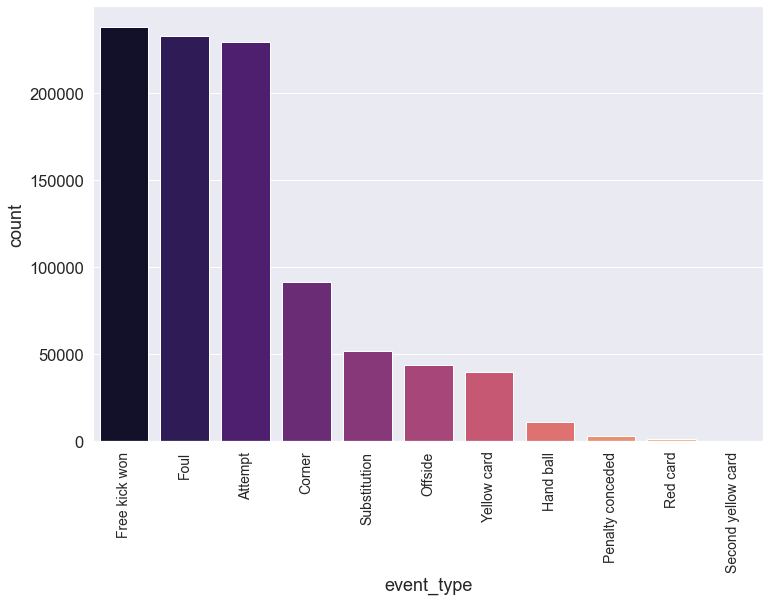

In [101]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.set(font_scale = 1.5)
g = sns.countplot(x = 'event_type', data = df, palette = 'magma',
                order = df['event_type'].value_counts().index)
g = g.set_xticklabels(labels = g.get_xticklabels(), rotation=90, fontsize=14)

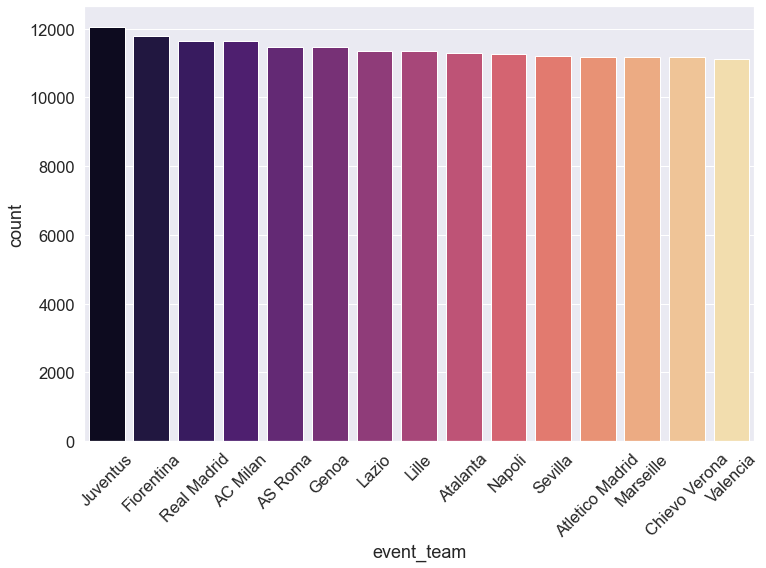

In [102]:
n = 15
top_teams = df['event_team'].value_counts()[:n].index.tolist()
top20_teams_df = df[df['event_team'].isin(top_teams)]
g = sns.countplot(x = 'event_team', data = top20_teams_df, palette = 'magma',
                 order = top20_teams_df['event_team'].value_counts().index)
g = g.set_xticklabels(labels = g.get_xticklabels(), rotation=45)

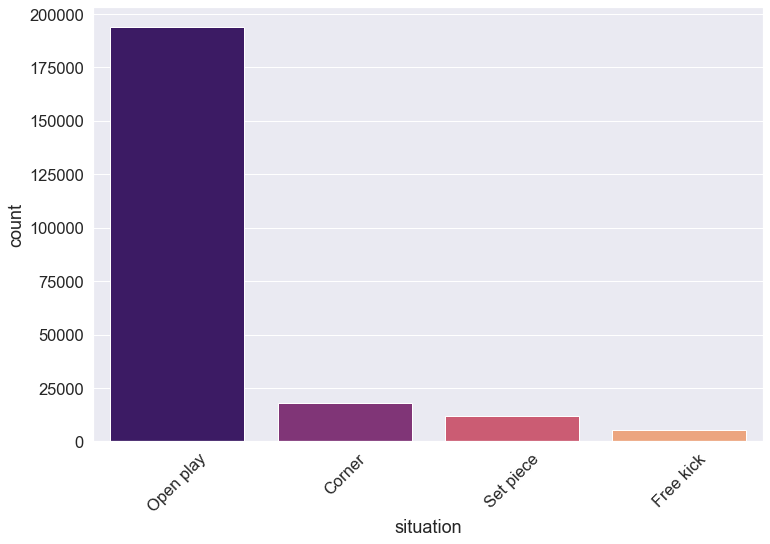

In [103]:
g = sns.countplot(x = 'situation', data = df, palette = 'magma',
                 order = df['situation'].value_counts().index)
g = g.set_xticklabels(labels = g.get_xticklabels(), rotation=45)

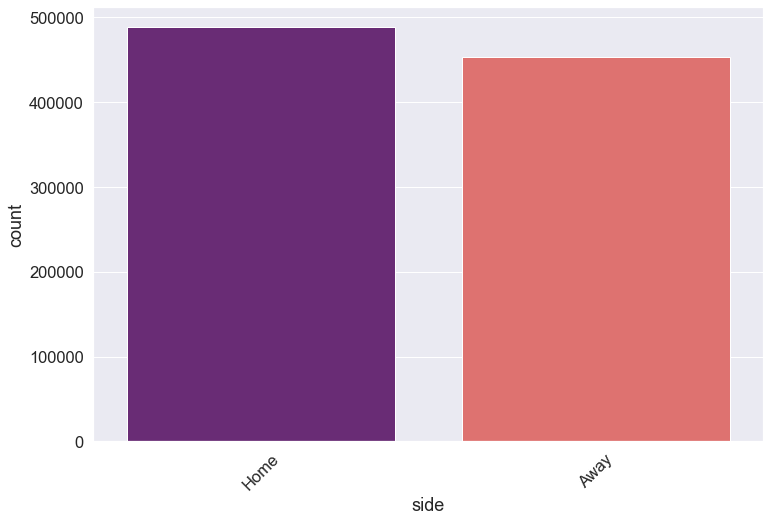

In [104]:
g = sns.countplot(x = 'side', data = df, palette = 'magma',
                 order = df['side'].value_counts().index)
g = g.set_xticklabels(labels = g.get_xticklabels(), rotation=45)

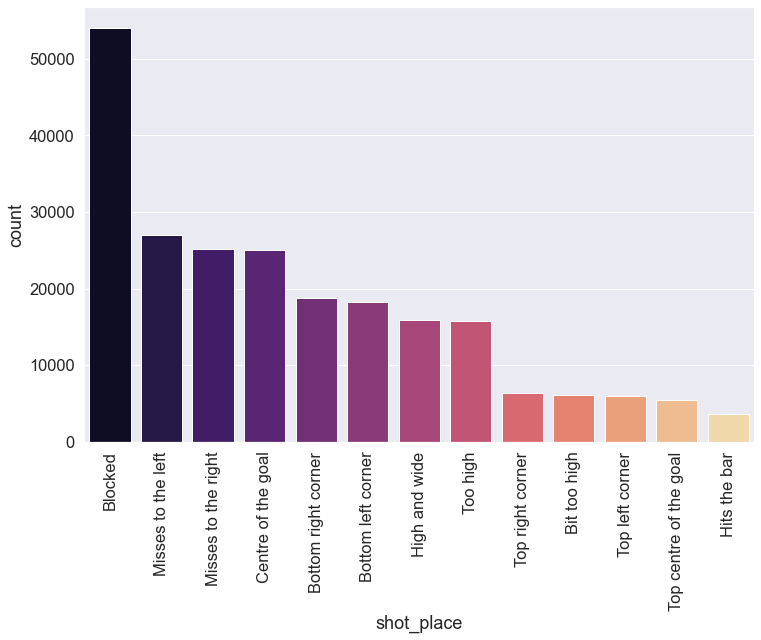

In [105]:
g = sns.countplot(x = 'shot_place', data = df, palette = 'magma',
                 order = df['shot_place'].value_counts().index)
g = g.set_xticklabels(labels = g.get_xticklabels(), rotation=90)

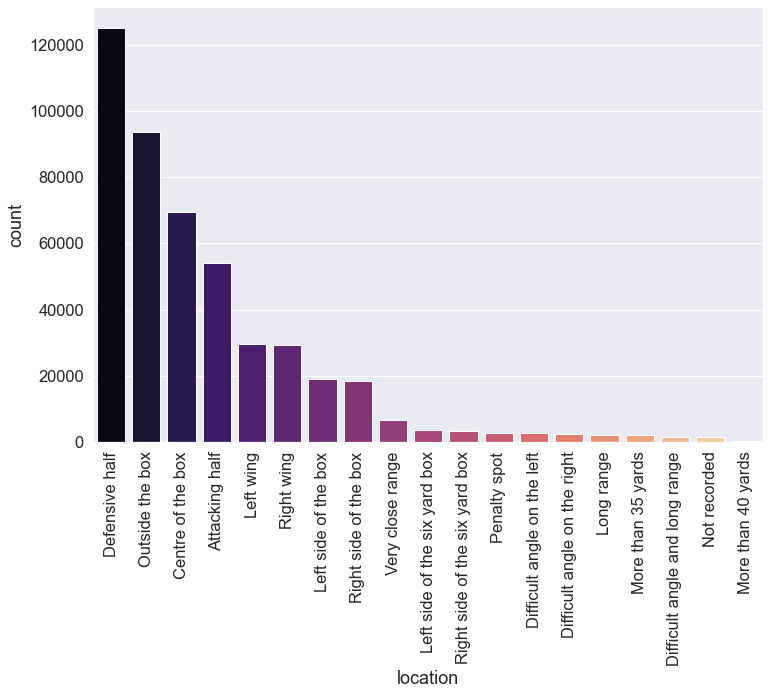

In [106]:
g = sns.countplot(x = 'location', data = df, palette = 'magma',
                 order = df['location'].value_counts().index)
g = g.set_xticklabels(labels = g.get_xticklabels(), rotation=90)

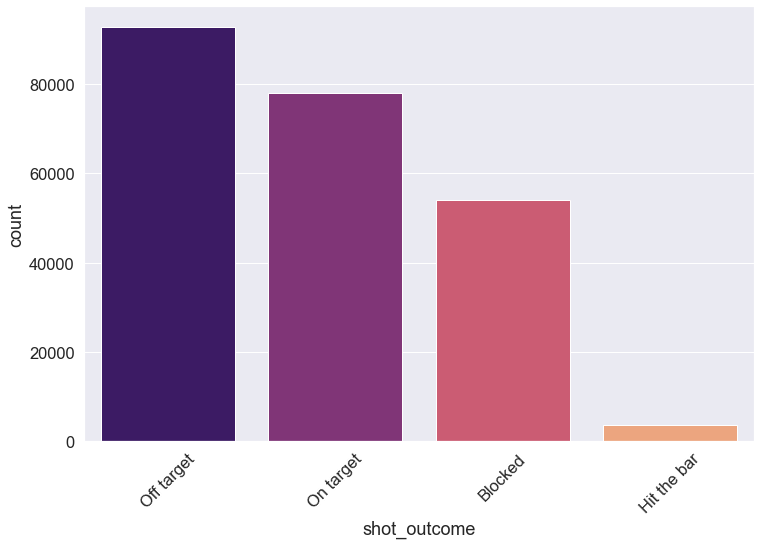

In [107]:
g = sns.countplot(x = 'shot_outcome', data = df, palette = 'magma')
g = g.set_xticklabels(labels = g.get_xticklabels(), rotation=45)

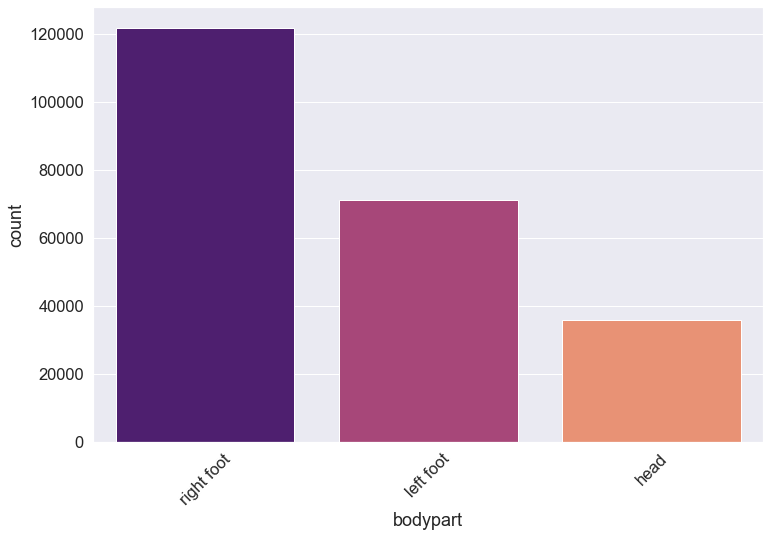

In [108]:
g = sns.countplot(x = 'bodypart', data = df, palette = 'magma',
                 order = df['bodypart'].value_counts().index)
g = g.set_xticklabels(labels = g.get_xticklabels(), rotation=45)

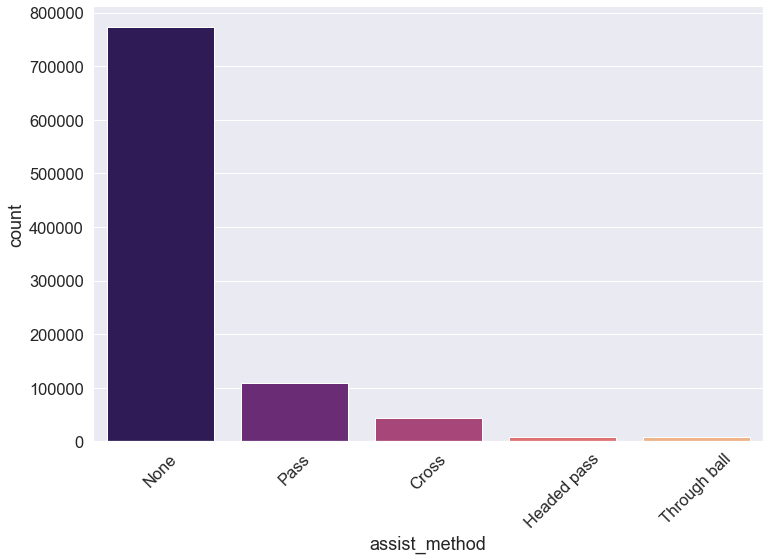

In [109]:
g = sns.countplot(x = 'assist_method', data = df, palette = 'magma',
                 order = df['assist_method'].value_counts().index)
g = g.set_xticklabels(labels = g.get_xticklabels(), rotation=45)

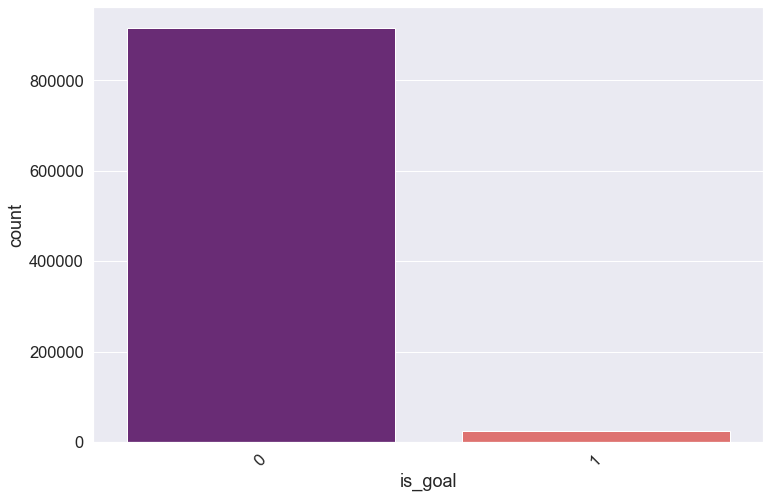

In [110]:
g = sns.countplot(x = 'is_goal', data = df, palette = 'magma')
g = g.set_xticklabels(labels = g.get_xticklabels(), rotation=45)

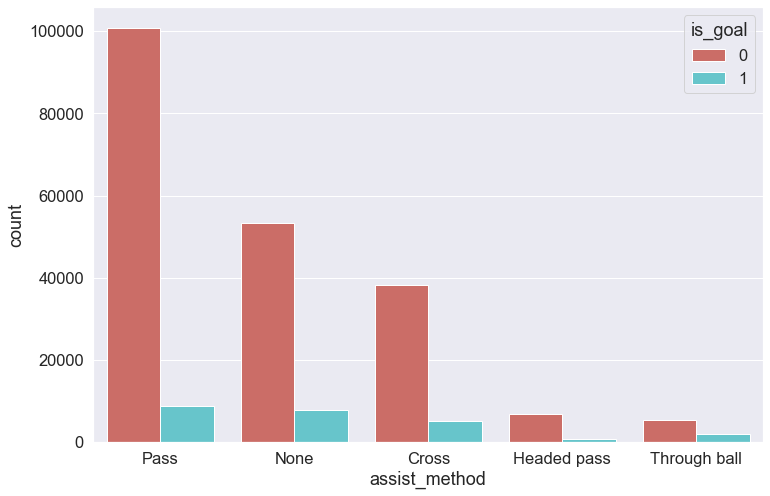

In [111]:
ndf = df[df['event_type'] == 'Attempt']
g = sns.countplot(x = 'assist_method', hue='is_goal', data = ndf, palette = 'hls')

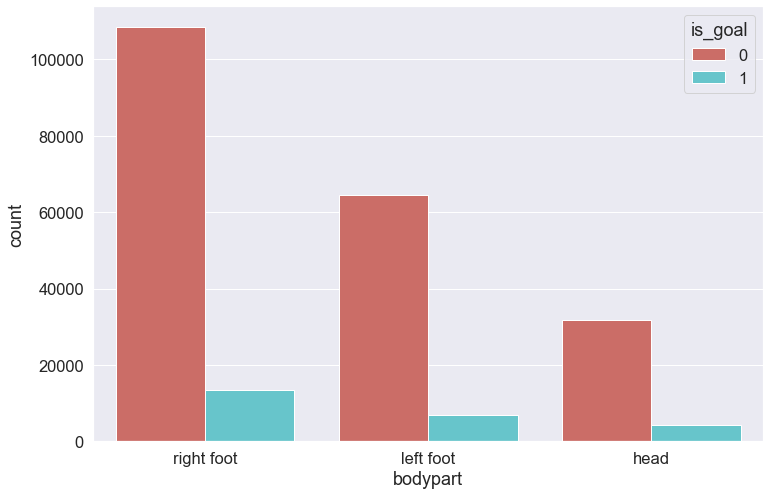

In [112]:
g = sns.countplot(x = 'bodypart', hue='is_goal', data = df, palette = 'hls',
                 order = df['bodypart'].value_counts().index)

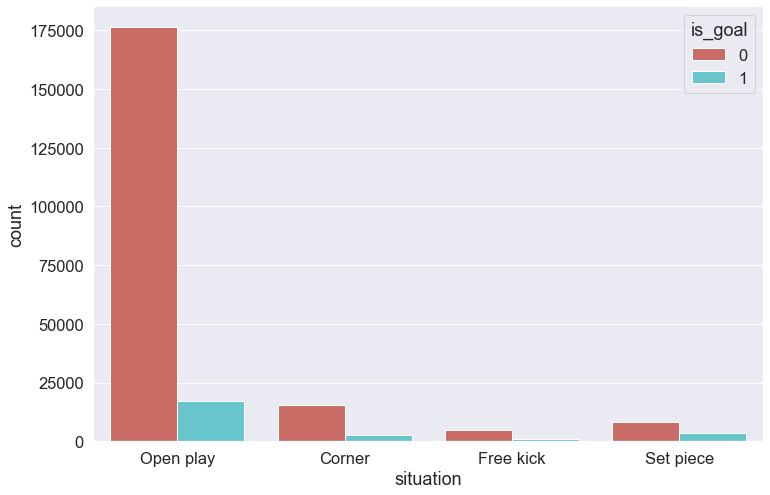

In [113]:
g = sns.countplot(x = 'situation', hue='is_goal', data = df, palette = 'hls')

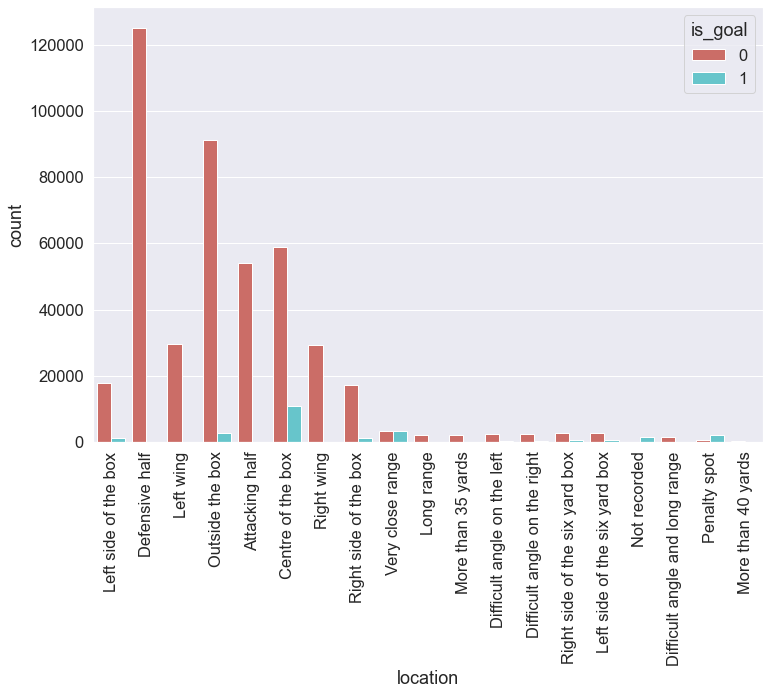

In [114]:
g = sns.countplot(x = 'location', hue='is_goal', data = df, palette = 'hls')
g = g.set_xticklabels(labels = g.get_xticklabels(), rotation=90)

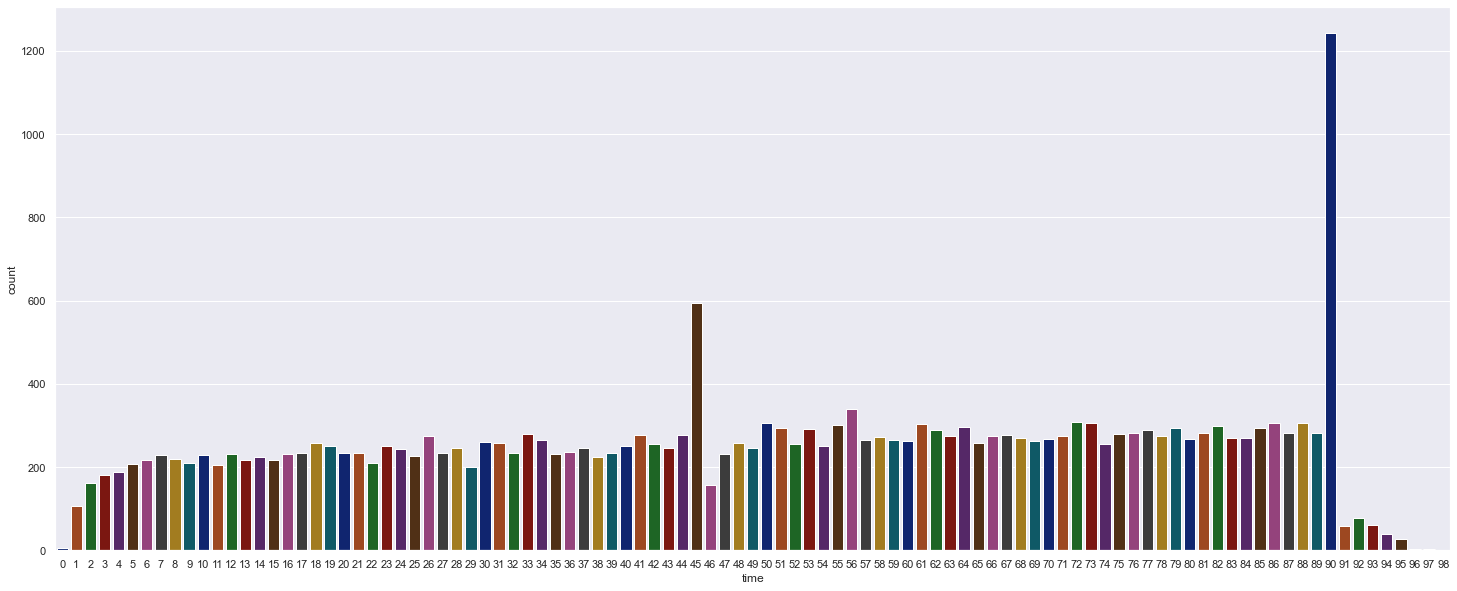

In [115]:
df_goals = df[df['is_goal'] == 1]
g = sns.set(rc={'figure.figsize':(25, 10)})
g = sns.countplot(x = 'time', data = df_goals, palette = 'dark')

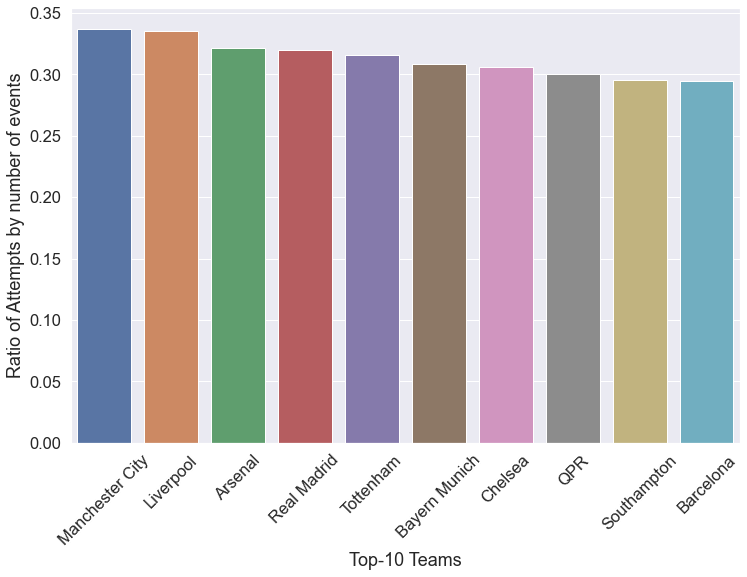

In [117]:
g = sns.set(rc={'figure.figsize':(12, 8)})
sns.set(font_scale = 1.5)

teams = list(set(df['event_team'].tolist()))
n = 10

df_attemps = df[df['event_type'] == 'Attempt']

attempt_counts = df_attemps['event_team'].value_counts()
total_counts = df['event_team'].value_counts()

ratio = {}

for team in teams:
    ratio[team] = attempt_counts[team] / total_counts[team]
    
ratio = dict( sorted(ratio.items(), key=operator.itemgetter(1),
             reverse=True))

filterd_teams = []
attempts_ratio = []

for key in ratio:
    if not n:
        break
    filterd_teams.append(key)
    attempts_ratio.append(ratio[key])
    n -= 1
    
g = sns.barplot(x=filterd_teams, y=attempts_ratio)
g = g.set_xticklabels(labels = g.get_xticklabels(), rotation=45)

plt.xlabel("Top-10 Teams")
plt.ylabel("Ratio of Attempts by number of events")
plt.show(g)

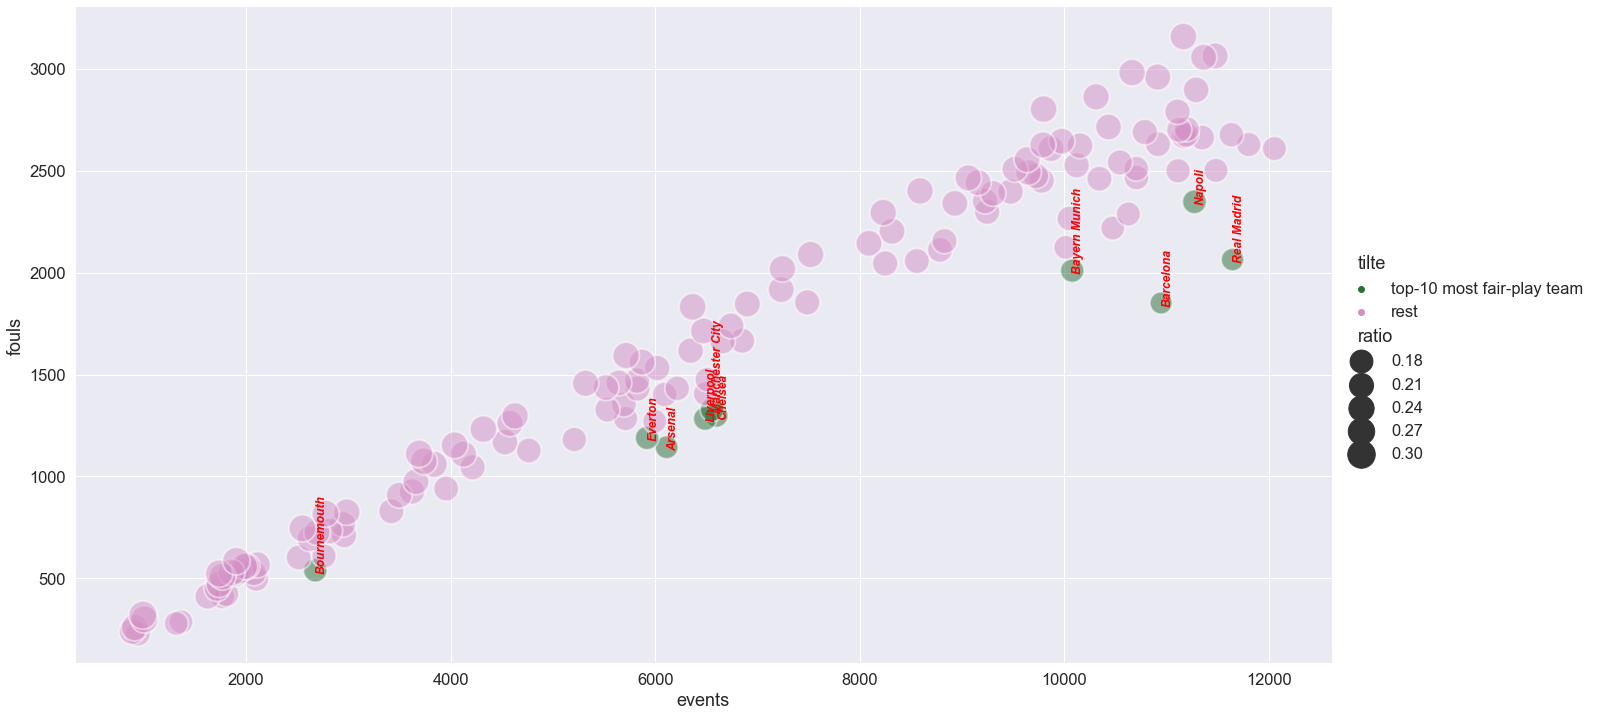

In [120]:
df_fouls = df[df['event_type'] == 'Foul']
foul_counts = df_fouls['event_team'].value_counts()

events = []
fouls = []
fairplay_ratio = []

for team in teams:
    events.append(total_counts[team])
    fouls.append(foul_counts[team])
    fairplay_ratio.append(foul_counts[team]/total_counts[team])

data = {'team': teams, 'events': events, 'fouls': fouls, 'ratio': fairplay_ratio}
ndf = pd.DataFrame(data)
ndf = ndf.sort_values('ratio', ascending=True)
ndf['tilte'] = 'rest'
ndf.loc[ndf.head(10).index, 'tilte'] = 'top-10 most fair-play team'

sns.set(font_scale = 1.5)
g = sns.relplot(x="events", y="fouls", size="ratio", hue="tilte",
            sizes=(500, 800), aspect=15/8, alpha=.5, palette="cubehelix",
            height=10, data=ndf)

ax = g.axes[0,0]

for idx, row in ndf.head(10).iterrows():
    x = row['events']
    y = row['fouls']
    text = row['team']
    ax.text(x+.05, y, text, horizontalalignment='left', color='red',
            style ='italic', fontweight ='bold', fontsize = 12, rotation=90)

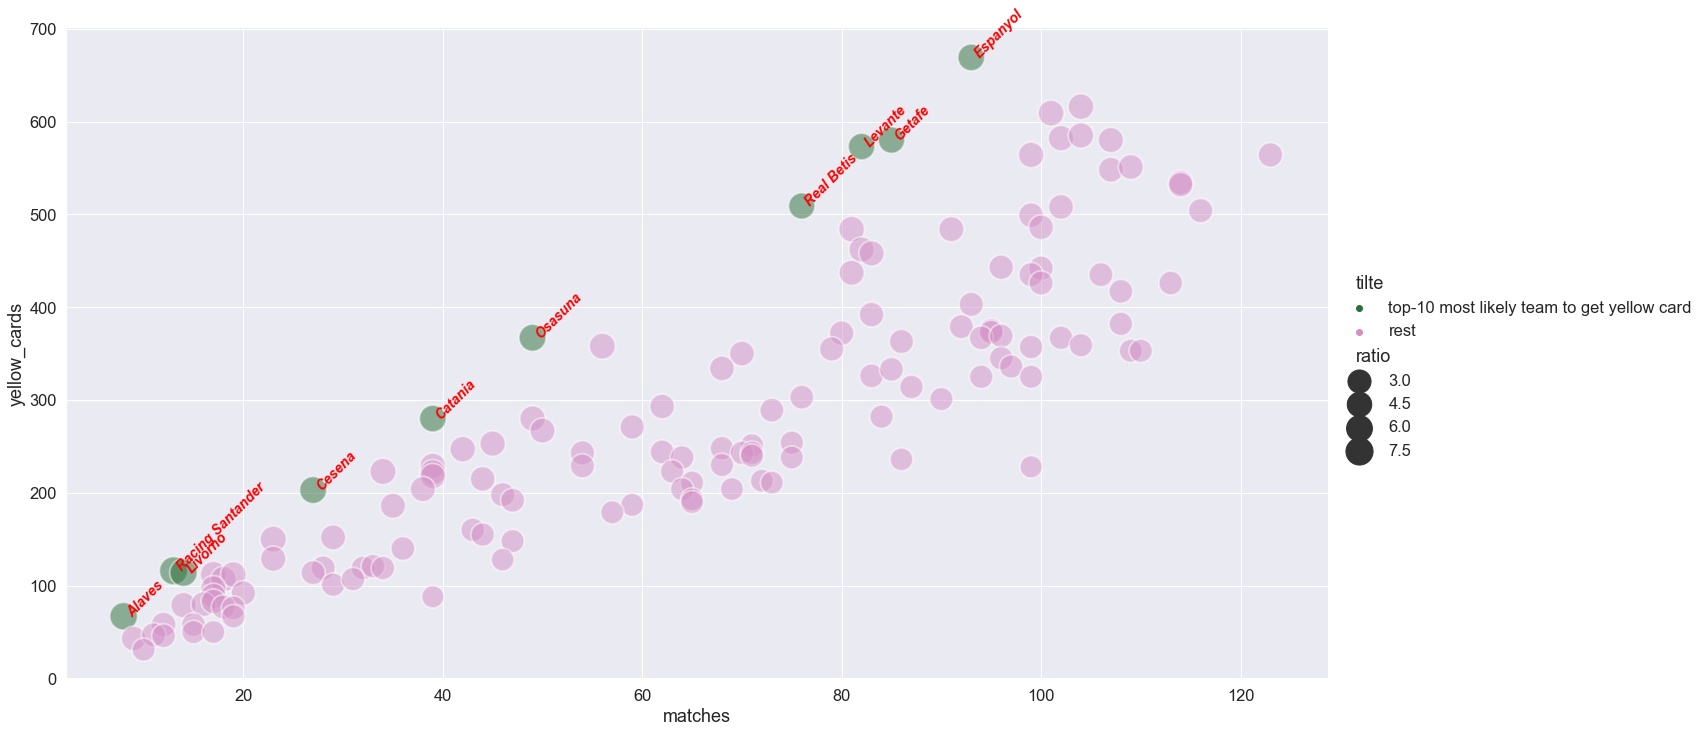

In [121]:
df_unique_matches = df.drop_duplicates(subset=['id_odsp'], inplace=False)
df_yellow_cards = df[df['event_type'] == 'Yellow card']
match_counts = df_unique_matches['event_team'].value_counts()
yellow_card_counts = df_yellow_cards['event_team'].value_counts()

matches = []
yellow_cards = []
yellow_cards_per_match = []

for team in teams:
    matches.append(match_counts[team])
    yellow_cards.append(yellow_card_counts[team])
    yellow_cards_per_match.append(yellow_card_counts[team]/match_counts[team])

data = {'team': teams, 'matches': matches, 'yellow_cards': yellow_cards, 'ratio': yellow_cards_per_match}
ndf = pd.DataFrame(data)
ndf = ndf.sort_values('ratio', ascending=False)
ndf['tilte'] = 'rest'
ndf.loc[ndf.head(10).index, 'tilte'] = 'top-10 most likely team to get yellow card'

sns.set(font_scale = 1.5)
g = sns.relplot(x="matches", y="yellow_cards", size="ratio", hue="tilte",
            sizes=(500, 800), aspect=15/8, alpha=.5, palette="cubehelix",
            height=10, data=ndf)

ax = g.axes[0,0]

for idx, row in ndf.head(10).iterrows():
    x = row['matches']
    y = row['yellow_cards']
    text = row['team']
    ax.text(x+.05, y, text, horizontalalignment='left', color='red',
            style ='italic', fontweight ='bold', fontsize = 14, rotation=45)

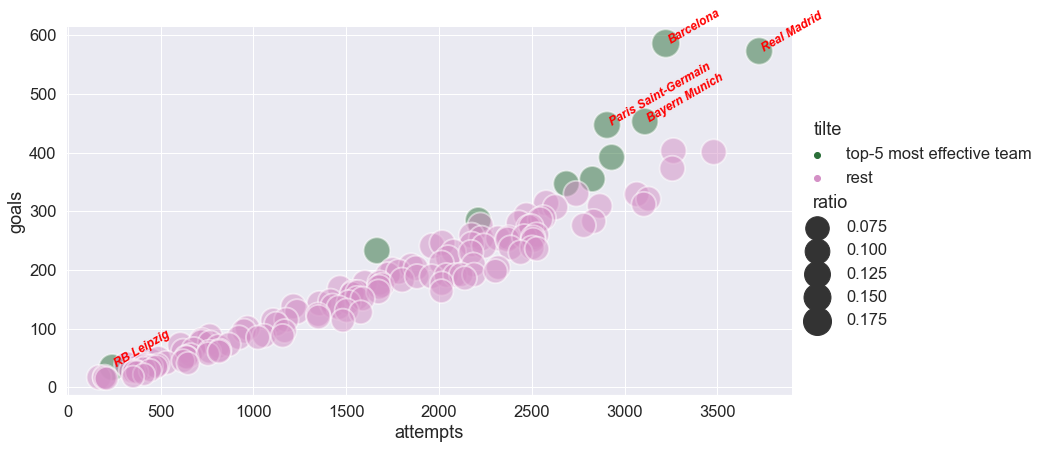

In [123]:
df_goals = df[df['is_goal'] == 1]
goal_counts = df_goals['event_team'].value_counts()

attempts = []
goals = []
effective_ratio = []

for team in teams:
    attempts.append(attempt_counts[team])
    goals.append(goal_counts[team])
    effective_ratio.append(goal_counts[team]/attempt_counts[team])

data = {'team': teams, 'attempts': attempts, 'goals': goals, 'ratio': effective_ratio}
ndf = pd.DataFrame(data)
ndf = ndf.sort_values('ratio', ascending=False)
ndf['tilte'] = 'rest'
ndf.loc[ndf.head(5).index, 'tilte'] = 'top-5 most effective team'

g = sns.relplot(x="attempts", y="goals", size="ratio", hue="tilte",
            sizes=(500, 800), aspect=15/8, alpha=.5, palette="cubehelix",
            height=6, data=ndf)

ax = g.axes[0,0]

for idx, row in ndf.head(5).iterrows():
    x = row['attempts']
    y = row['goals']
    text = row['team']
    ax.text(x+.05, y, text, horizontalalignment='left', color='red',
            style ='italic', fontweight ='bold', fontsize = 12, rotation=30)

## Characteristics of goal attempts of the top-2 most effective teams

In [19]:
ndf.head(2)

,team,attempts,goals,ratio,tilte
137,Barcelona,3222,586,0.181875,top-10 most effective team
64,Paris Saint-Germain,2905,447,0.153873,top-10 most effective team


In [20]:
def characteristic_of_team(df, team):
    df_goals = df[df['is_goal'] == 1]
    locations = df['location'].unique().tolist()
    situations = df['situation'].unique().tolist()
    assists = df['assist_method'].unique().tolist()

    # goals and fiels locations
    counts = []
    for location in locations:
        ndf = df_goals[df_goals['location'] == location]
        count = ndf['event_team'].value_counts()
        try:
            counts.append(count['Barcelona'])
        except:
            counts.append(0)

    data = {'location': locations, 'goals': counts}
    location_goal_df = pd.DataFrame(data)
    location_goal_df = location_goal_df.sort_values('goals', ascending=False)

    counts = []
    for situation in situations:
        ndf = df_goals[df_goals['situation'] == situation]
        count = ndf['event_team'].value_counts()
        try:
            counts.append(count['Barcelona'])
        except:
            counts.append(0)

    data = {'situation': situations, 'goals': counts}
    situation_goal_df = pd.DataFrame(data)
    situation_goal_df = situation_goal_df.sort_values('goals', ascending=False)

    counts = []
    for assist in assists:
        ndf = df_goals[df_goals['assist_method'] == assist]
        count = ndf['event_team'].value_counts()
        try:
            counts.append(count['Barcelona'])
        except:
            counts.append(0)

    data = {'assist_mthod': assists, 'goals': counts}
    assist_goal_df = pd.DataFrame(data)
    assist_goal_df = assist_goal_df.sort_values('goals', ascending=False)

    return location_goal_df, situation_goal_df, assist_goal_df

### Barcelona goal attempt characteristics 

In [21]:
location_goal_df, situation_goal_df, assist_goal_df = characteristic_of_team(df, 'Barcelona')
location_goal_df.head(4)

,location,goals
6,Centre of the box,283
9,Very close range,72
4,Outside the box,46
18,Penalty spot,44


In [22]:
situation_goal_df.head(4)

,situation,goals
0,Open play,472
4,Set piece,60
2,Corner,34
3,Free kick,20


In [23]:
assist_goal_df.head(4)

,assist_mthod,goals
0,Pass,267
1,None,165
4,Through ball,84
2,Cross,66


### Real Madrid goal attempt characteristics 

In [24]:
location_goal_df, situation_goal_df, assist_goal_df = characteristic_of_team(df, 'Real madrid')
location_goal_df.head(4)

,location,goals
6,Centre of the box,283
9,Very close range,72
4,Outside the box,46
18,Penalty spot,44
